In [1]:
#reading in the data
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import csv
from sklearn.metrics import confusion_matrix
mine =r"C:\Users\ashle\OneDrive - Stonehill College\Machine Learning\flower_data\train\""
mine = mine[:len(mine)-1]
images = []
thefiles = []
labels= []
for i in range(1,13): #102 labels
    this = (mine+str(i))
    for root, dirs, files in os.walk(this):
        c = 0
        for file in files:
            thefiles.append(os.path.join(root,file))
            image = plt.imread(os.path.join(root,file))
            image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
            image = tf.image.resize(image, (256, 256)) # Resizing the image to 224x224 dimention
            images.append(image)
            labels.append(i)
                
            #imag = tfa.image.transform_ops.rotate(image, 90)
            #images.append(imag)
            #labels.append(i)
            #transpose = tf.image.flip_left_right(image)
            #images.append(transpose)
            #labels.append(i)
            #imag1 = tfa.image.transform_ops.rotate(image, 180)
            #images.append(imag1)
            #labels.append(i)
            #imag2 = tfa.image.transform_ops.rotate(imag1, 90)
            #images.append(imag2)
            #labels.append(i)
            c += 1
            if c > 10:
                break

#fig = plt.figure()
#plt.imshow(image)
#plt.show()
#plt.imshow(imag)
#plt.show()
#plt.imshow(transpose)
#plt.show()
#plt.imshow(imag1)
#plt.show()
#plt.imshow(imag2)
#plt.show()

#plt.figure(figsize=(10,10))
#for i in range(25):
#    plt.subplot(5,5,i+1)
#    plt.xticks([])
#    plt.yticks([])
#    plt.grid(False)
#    plt.imshow(images[i], cmap=plt.cm.binary)
#    plt.xlabel(labels[i])
#plt.show()
#plt.figure()
#plt.imshow(image)
#plt.show()

train = np.array(images)
print(train.shape)
tlabels = np.array(labels)
print(tlabels.shape)

(132, 256, 256, 3)
(132,)


In [2]:
#load validate data
minev =r"C:\Users\ashle\OneDrive - Stonehill College\Machine Learning\flower_data\valid\""
minev = minev[:len(minev)-1]
imagesv = []
thevfiles =[]
labelsv= []

for i in range(1,13): #102 labels
    this1 = (minev+str(i))
    for root, dirs, files in os.walk(this1):
        c = 0
        for file in files:
            thevfiles.append(os.path.join(root,file))
            image = plt.imread(os.path.join(root,file))
            image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
            image = tf.image.resize(image, (256, 256)) # Resizing the image to 224x224 dimention
            imagesv.append(image)
            labelsv.append(i)
            c+=1
            if c > 10:
                break

valid = np.array(imagesv)
print(valid.shape)
labelsv = np.array(labelsv)
print(labelsv.shape)

(58, 256, 256, 3)
(58,)


Epoch 1/6
5/5 [==============================] - 15s 3s/step - loss: 2.7698 - accuracy: 0.0985 - val_loss: 2.4374 - val_accuracy: 0.1207
Epoch 2/6
5/5 [==============================] - 14s 3s/step - loss: 2.3397 - accuracy: 0.2500 - val_loss: 2.2495 - val_accuracy: 0.1897
Epoch 3/6
5/5 [==============================] - 13s 3s/step - loss: 2.0114 - accuracy: 0.4091 - val_loss: 1.9756 - val_accuracy: 0.2414
Epoch 4/6
5/5 [==============================] - 13s 3s/step - loss: 1.6039 - accuracy: 0.5682 - val_loss: 1.9384 - val_accuracy: 0.3103
Epoch 5/6
5/5 [==============================] - 13s 3s/step - loss: 1.3333 - accuracy: 0.5682 - val_loss: 2.1129 - val_accuracy: 0.1552
Epoch 6/6
5/5 [==============================] - 13s 3s/step - loss: 0.9493 - accuracy: 0.6288 - val_loss: 2.0832 - val_accuracy: 0.3621


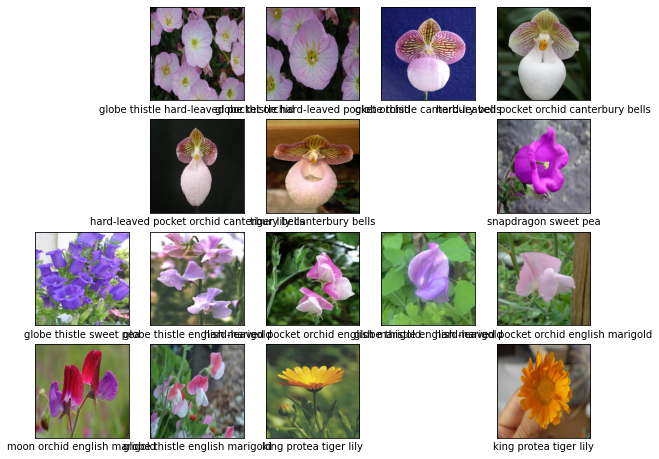

In [20]:
import tensorflow as tf
import numpy as np
#To randomize, you would generate a list of indices, and use that to do your cross val splits 
#(I think in tensorflow you have to create perform the split and separate trains yourself, 
#but can pass that to the validate option). You want to basically pass in all your train and 
#labels at once to fit, so they should all be in the same array.
# Import Module
def createModel():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (255,255,3)),
        #Hidden layers
        tf.keras.layers.Dense(103,activation = 'relu'), #relu is a type of activation function
        tf.keras.layers.Dense(103,activation = 'relu'),
        tf.keras.layers.Dense(103)#number of labels
        ])

    model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                  metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
                  )
    return model

def createModel2():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(64,(3,3), activation = 'relu',input_shape = (256,256,3))) #CHANGED (None,28,28) to (28,28,1)
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Dropout(.2))
    model.add(tf.keras.layers.Flatten())
    #kernel_regularizer=tf.keras.regularizers.l2(0.001)
    model.add(tf.keras.layers.Dense(25))
    model.add(tf.keras.layers.Dense(25))
    model.add(tf.keras.layers.Dense(13))

    #model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
    #              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    #              metrics=['accuracy']
    #              )
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) 
              
    return model     

if __name__ == "__main__":
    class_names = ["pink primrose","hard-leaved pocket orchid", "canterbury bells","sweet pea","english marigold",
                   "tiger lily","moon orchid","bird of paradise","monkshood","globe thistle","snapdragon",
                   "colt's foot","king protea","spear thistle","yellow iris","globe-flower","purple coneflower",
                   "peruvian lily","balloon flower","giant white arum lily","fire lily","pincushion flower",
                   "fritillary","red ginger","grape hyacinth","corn poppy","prince of wales feathers","stemless gentian",
                   "artichoke","sweet william","carnation","garden phlox","love in the mist","mexican aster","alpine sea holly",
                   "ruby-lipped cattleya", "cape flower","great masterwort","siam tulip","lenten rose","barbeton daisy",
                   "daffodil","sword lily","poinsettia","bolero deep blue","wallflower","marigold","buttercup","oxeye daisy",
                   "common dandelion","petunia","wild pansy","primula","sunflower","pelargonium","bishop of llandaff","gaura",
                   "geranium","orange dahlia","pink-yellow dahlia","cautleya spicata","japanese anemone","black-eyed susan",
                   "silverbush","californian poppy","osteospermum","spring crocus","bearded iris","windflower","tree poppy",
                   "gazania","azalea","water lily","rose","thorn apple","morning glory","passion flower","lotus lotus",
                   "toad lily","anthurium","frangipani","clematis","hibiscus","columbine","desert-rose","tree mallow","magnolia",
                   "cyclamen","watercress","canna lily","hippeastrum","bee balm","ball moss","foxglove","bougainvillea","camellia","mallow","mexican petunia","bromelia","blanket flower","trumpet creeper","blackberry lily"]
    (train,test) = (train, valid)
    model = createModel2()
    history = model.fit(train,tlabels,epochs = 6, validation_data = (test,labelsv))
    
    
    #temp = confusion_matrix(vlabels, predictions, labels=class_names)
    #with open("confusion.csv",'w') as writer:
     #   for row in temp:
      #      writer.write(",".join([str(i) for i in row])+'\n')
    
    #tf.math.confusion_matrix(test)
    
    #acc = history.history['accuracy']
    #val_acc = history.history['val_accuracy']
    #loss = history.history['loss']
    #val_loss = history.history['val_loss']
    #epochs_range = range(100)

    #plt.figure(figsize=(15, 15))
    #plt.subplot(2, 2, 1)
    #plt.plot(epochs_range, acc, label='Training Accuracy')
    #plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    #plt.legend(loc='lower right')
    #plt.title('Training and Validation Accuracy')

    #plt.subplot(2, 2, 2)
    #plt.plot(epochs_range, loss, label='Training Loss')
    #plt.plot(epochs_range, val_loss, label='Validation Loss')
    #plt.legend(loc='upper right')
    #plt.title('Training and Validation Loss')
    #plt.show()
    
    predictions=model.predict(test) 
    classes_p=np.argmax(predictions,axis=1)
    #for label in these:
    #    print(label)
    #temp = tf.math.confusion_matrix(labelsv, these,13)
    #print(temp)
    plt.figure(figsize=(10,10))
    for i in range(25):
        if(classes_p[i]!=labelsv[i]):
            plt.subplot(5,5,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(test[i])
            plt.xlabel(class_names[classes_p[i]], ' ', class_names[labelsv[i]])
    plt.show()
    
    